# Positional Encoding
- 단어 사이 순차성을 반영하기 위한 기법
  - Transformer Model은 RNN 계열 방법론과는 달리 입력값을 순차적으로 처리하지 않음
  - **순차성을 부여할 수 있도록 추가적인 처리가 필요**
  - **Word Embedding을 통해 나온 embedding vector의 차원인 d_model(D)를 사용**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch


$$
\begin{align*} PE_{pos, 2i} &= \sin\left( \frac{pos}{10000^{2i/D}} \right), \\ PE_{pos, 2i+1} &= \cos\left( \frac{pos}{10000^{2i/D}} \right).\end{align*}
$$

**sin / cos에 대입할 Angle 구하는 함수**   

### `d_model(D)`
- Word Embedding을 통해 출력된 output의 차원 (embedding vector 차원)

### `pos`
- 입력 시퀀스 데이터에서의 embedding vector의 위치   
  ex> Input: 나는 학생 이다   
  ```
  나는 = 0, 학생 = 1, 이다 = 2
  ```

### `i`
- embedding vector 내 차원의 순서   
  ex> 4차원: 0, 1, 2, 3

In [6]:
# Positional Encoding Function
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
  return pos * angle_rates

**Positional Encoding 처리 함수**

In [7]:
def positional_encoding(position, d_model):

  # numpy broadcasting을 통해 get_angles의 pos * angle_rates가 자동으로 (position, d_model) shape으로 계산
  # 모든 위치(pos)마다, 모든 차원(i)에 대해 값을 계산
  angle_rads = get_angles(
      np.arange(position)[:, np.newaxis],
      np.arange(d_model)[np.newaxis, :],
      d_model
  )

  # 짝수/홀수 => sin/cos
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  angle_rads[:, 1::2] = np.sin(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return torch.FloatTensor(pos_encoding)

**시각화 해보기**

In [8]:
position = 100    # 문장 최대 길이
d_model = 32      # embedding dimension

In [9]:
pe = positional_encoding(position, d_model) # shape: (1, 100, 32)
print(pe.shape)

torch.Size([1, 100, 32])


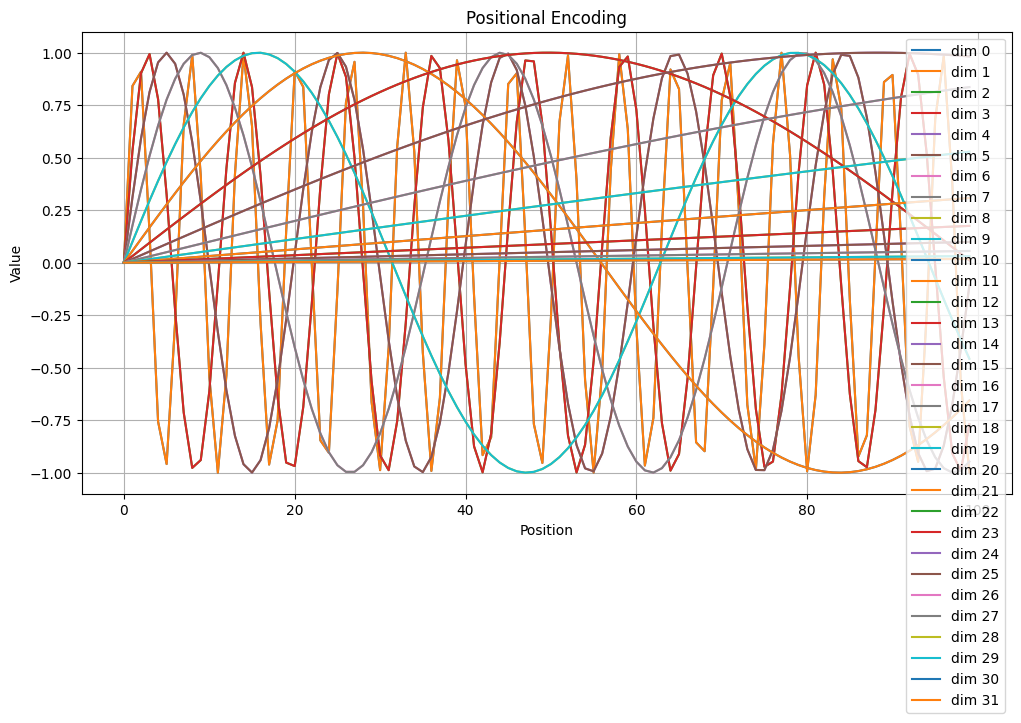

In [14]:
plt.figure(figsize=(12, 6))
for i in range(d_model):
    plt.plot(np.arange(position), pe[0, :, i], label=f"dim {i}")

plt.title("Positional Encoding")
plt.xlabel("Position")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

- 차원이 커질수록 주기의 폭이 넓어진다